<a href="https://colab.research.google.com/github/elatedgorilla-art/content/blob/main/DATA_342_Fall_2025_Lab_2_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!pip install openpyxl matplotlib pandas


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import pandas as pd
import requests

file_id = '1RatOFrajyOyFmEt69TSaAZZTNT3Bjh9c'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('DATA 342 Fall 2025 Lab 1.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('DATA 342 Fall 2025 Lab 1.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")

In [38]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
0 2024-01-02    CVS      75.03           NaN
1 2024-01-03    CVS      75.06      0.000400
2 2024-01-04    CVS      74.71     -0.004663
3 2024-01-05    CVS      75.56      0.011377
4 2024-01-08    CVS      74.87     -0.009132


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

In [40]:
cvs_df = df[df['Ticker'] == 'CVS'].copy()
unh_df = df[df['Ticker'] == 'UNH'].copy()

In [41]:
print("\nCVS Health Daily Returns:")
print(cvs_df[['Date', 'Adj Close', 'Daily Return']].head())
print("\nUnited Health Daily Returns:")
print(unh_df[['Date', 'Adj Close', 'Daily Return']].head())


CVS Health Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      75.06      0.000400
2 2024-01-04      74.71     -0.004663
3 2024-01-05      75.56      0.011377
4 2024-01-08      74.87     -0.009132
5 2024-01-09      74.57     -0.004007

United Health Daily Returns:
          Date  Adj Close  Daily Return
252 2024-01-03     524.35      0.004983
253 2024-01-04     527.63      0.006255
254 2024-01-05     519.85     -0.014745
255 2024-01-08     519.02     -0.001597
256 2024-01-09     520.81      0.003449


/tmp/ipython-input-3950593986.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cvs_df['Daily Return'], unh_df['Daily Return']], labels=['CVS', 'United Health'])


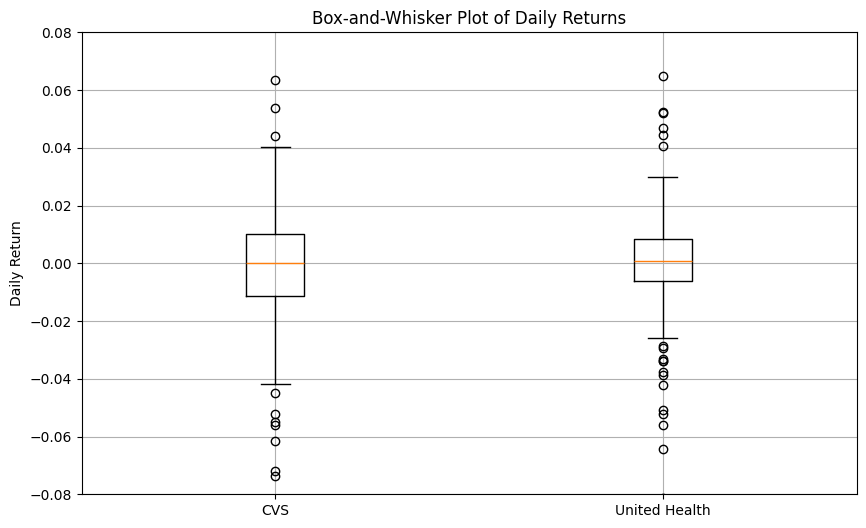

In [42]:
plt.figure(figsize=(10, 6))
plt.boxplot([cvs_df['Daily Return'], unh_df['Daily Return']], labels=['CVS', 'United Health'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.ylim(-0.08, 0.08) # Set the y-axis limits
plt.show()

In [43]:
print("CVS Daily Return column:")
print(cvs_df['Daily Return'].head())
print("\nUnited Health Daily Return column:")
print(unh_df['Daily Return'].head())
print("\nData types of Daily Return columns:")
print("CVS:", cvs_df['Daily Return'].dtype)
print("United Health:", unh_df['Daily Return'].dtype)

CVS Daily Return column:
1    0.000400
2   -0.004663
3    0.011377
4   -0.009132
5   -0.004007
Name: Daily Return, dtype: float64

United Health Daily Return column:
252    0.004983
253    0.006255
254   -0.014745
255   -0.001597
256    0.003449
Name: Daily Return, dtype: float64

Data types of Daily Return columns:
CVS: float64
United Health: float64


In [44]:
from scipy import stats

def descriptive_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max()
    }

# Compute descriptive statistics
cvs_stats = descriptive_stats(cvs_df['Daily Return'])
unh_stats = descriptive_stats(unh_df['Daily Return'])

print("Descriptive Statistics for CVS Health (CVS):")
for key, value in cvs_stats.items():
    print(f"{key}: {value}")

print("\nDescriptive Statistics for United Health (unh):")
for key, value in unh_stats.items():
    print(f"{key}: {value}")

Descriptive Statistics for CVS Health (CVS):
Mean: -0.0020066471134047997
Median: 0.0002546041943
Mode: -0.1683848797
Standard Deviation: 0.022814905292824095
Sample Variance: 0.0005205199035205329
Kurtosis: 13.746087914570627
Skewness: -1.339584475330713
Range: 0.2818428236
Minimum: -0.1683848797
Maximum: 0.1134579439

Descriptive Statistics for United Health (unh):
Mean: -3.0619555537599985e-05
Median: 0.00076655074105
Mode: -0.08112395578
Standard Deviation: 0.01719532555169221
Sample Variance: 0.00029567922082867905
Kurtosis: 4.129144160789698
Skewness: -0.5123136134624652
Range: 0.1461194795
Minimum: -0.08112395578
Maximum: 0.06499552372


In [45]:
t_stat, p_value = stats.ttest_ind(cvs_df['Daily Return'], unh_df['Daily Return'], equal_var=False)
print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis Testing (Independent t-test):
T-statistic: -1.0936162105034082
P-value: 0.27469213587258057


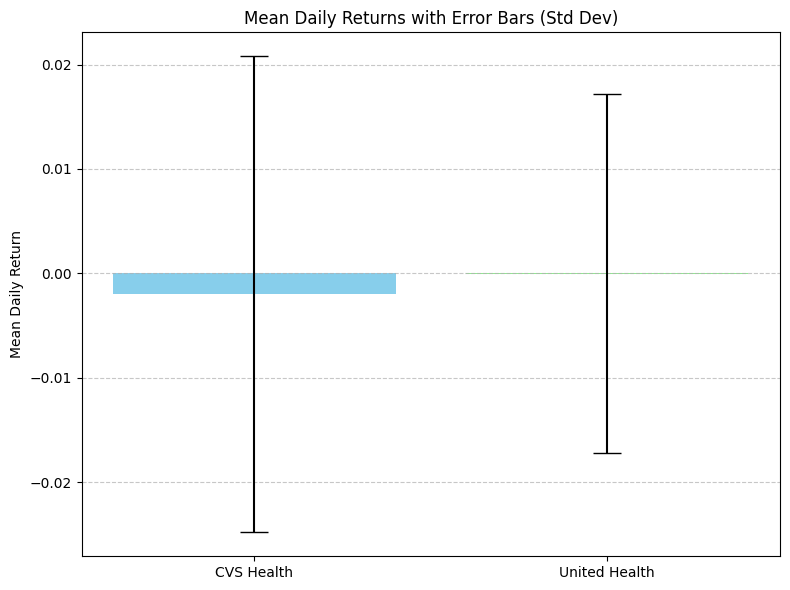

In [46]:
!pip install pandas matplotlib openpyxl scipy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the Excel file from Google Drive or URL
file_path = '/content/DATA 342 Fall 2025 Lab 1.xlsx'  # Update path if needed
df = pd.read_excel(file_path, sheet_name='Daily Returns 2024', engine='openpyxl')

# Clean and filter the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

# Separate CVS and UNH data
cvs_df = df[df['Ticker'] == 'CVS'].copy()
unh_df = df[df['Ticker'] == 'UNH'].copy()

# Compute mean and standard deviation for error bars
mean_cvs = cvs_df['Daily Return'].mean()
std_cvs = cvs_df['Daily Return'].std()
mean_unh = unh_df['Daily Return'].mean()
std_unh = unh_df['Daily Return'].std()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(cvs_df['Daily Return'], unh_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [mean_cvs, mean_unh]
errors = [std_cvs, std_unh]
labels = ['CVS Health', 'United Health']
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns with Error Bars (Std Dev)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()